In [1]:
library(SCnorm)

## SCnorm takes a 2D G-by-S sized matrix (Genes by Samples)
data(ExampleSimSCData)
ExampleSimSCData[1:5,1:5]

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5
Gene_1,3.809447,0.5891684,6.505612,33.052416,0.000000
Gene_2,21.703998,3.9118515,0.000000,0.000000,5.651665
Gene_3,2.128070,0.0000000,11.587132,11.352172,5.402953
Gene_4,22.681505,0.0000000,27.495737,2.571482,8.248906
Gene_5,0.000000,23.9983434,38.810055,1.244605,12.693561


In [3]:
ExampleSimSCData <- SummarizedExperiment::SummarizedExperiment(
    assays = list("Counts"=ExampleSimSCData)
)

In [15]:
## the point of this? vector of ones
Conditions = rep(c(1), each=90)


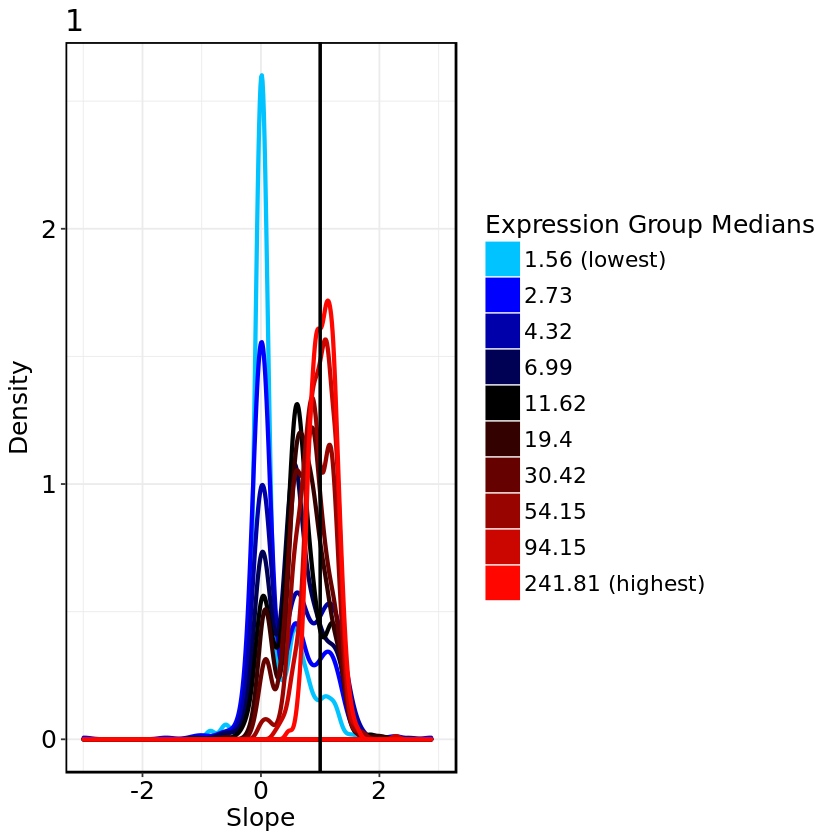

In [20]:
## Measure the count-depth relationship
## (expression counts vs sequencing depth)
## - If all genes have a similar relationshiip then we can use a global
##   normalisation strategy: median-by-ratio (DESeq), TMM (edgeR)
##
## - If count-depth relationship varies among genes, then we must use SCnorm

# First use plotCountDepth to estimate the count-depth in all genes:
#   - divide genes into 10 equally-sized groups based on their non-zero
#     median expression. Use filters if you only find some genes expressed
#     in few cells, or extremely lowly expressed.

countDepthEst <- plotCountDepth(Data = ExampleSimSCData, Conditions = Conditions,
                               FilterCellProportion = .1, NCores=3)

In [19]:
head(countDepthEst[[1]])

Gene,Group,Slope
Gene_1,4,0.076832005
Gene_10,1,-0.004653532
Gene_100,3,0.038000496
Gene_1000,3,-0.017253843
Gene_1001,3,-0.041956519
Gene_1002,4,-0.673548775
